<a href="https://colab.research.google.com/github/akshayiitr04/satellite-property-valuation/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

BASE = "/content/drive/MyDrive/satellite_project"

folders = [
    "data/raw",
    "data/processed",
    "images/raw",
    "images/processed"
]

for f in folders:
    os.makedirs(os.path.join(BASE, f), exist_ok=True)

print("Folders created")


Folders created


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
train = pd.read_csv(f"{BASE}/data/raw/train.csv")
test = pd.read_csv(f"{BASE}/data/raw/test.csv")

In [5]:
train.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1961             0    98055  47.4362 -122.187           1660   
1      1992             0    98031  47.4034 -122.187           1720   
2      1994             0    98003  47.2704 -122.313           1870   
3      2009             0    98027  47.5321 -122.073           1240   
4      1994             0    98042  47.3715 -122.074           1590   

   sqft_lot15  
0        9240  
1        3605  
2        7455  
3         750  
4        8071  

[5 rows x 21 columns]

In [6]:
train.shape
#year/month/date

(16209, 21)

In [93]:
train[train["price"] == 350000]


price  bedrooms  bathrooms  floors  waterfront  view  condition  \
285    350000         5       2.75     1.0           0     0          4   
368    350000         4       2.25     2.0           0     0          3   
430    350000         3       2.25     1.0           0     0          3   
566    350000         3       1.75     2.0           0     0          3   
663    350000         3       1.00     1.0           0     0          4   
...       ...       ...        ...     ...         ...   ...        ...   
15716  350000         3       3.25     2.0           0     0          3   
15836  350000         4       2.00     1.0           0     2          4   
15860  350000         3       1.00     1.0           0     0          4   
15910  350000         3       1.75     1.0           0     0          3   
16191  350000         3       3.00     1.0           0     0          3   

       grade  sqft_above  sqft_basement      lat     long  sqft_lot15  \
285        8        1730           1250  47.3774 -122.160       14800   
368        7        1770              0  47.4192 -122.201        7591   
430        7        1200            640  47.7408 -122.236        9929   
566        8        1260              0  47.5476 -122.005        1630   
663        7         850            170  47.7039 -122.340        4980   
...      ...         ...            ...      ...      ...         ...   
15716      8        1000            210  47.7114 -122.356        1493   
15836      8        2060              0  47.4404 -122.340       10370   
15860      7        1180              0  47.7276 -122.241        8154   
15910      7        1320              0  47.7267 -122.226       10500   
16191      8        2360            840  47.4121 -122.154       37887   

       house_age  is_renovated     zipcode_te  
285           40             0  314250.081967  
368           17             0  303052.073892  
430           27             0  449226.602620  
566           12             0  608821.554217  
663           73             0  384031.110512  
...          ...           ...            ...  
15716         12             0  384031.110512  
15836         57             0  455143.363158  
15860         50             0  516046.658098  
15910         48             0  516046.658098  
16191         36             0  314250.081967  

[134 rows x 16 columns]

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [8]:
train.describe()


id         price     bedrooms     bathrooms   sqft_living  \
count  1.620900e+04  1.620900e+04  16209.00000  16209.000000  16209.000000   
mean   4.575771e+09  5.374703e+05      3.36782      2.113054   2073.274601   
std    2.874661e+09  3.603036e+05      0.93327      0.765242    907.009491   
min    1.000102e+06  7.500000e+04      0.00000      0.000000    290.000000   
25%    2.123049e+09  3.200000e+05      3.00000      1.500000   1430.000000   
50%    3.904950e+09  4.500000e+05      3.00000      2.250000   1910.000000   
75%    7.304301e+09  6.400000e+05      4.00000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.00000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.620900e+04  16209.000000  16209.000000  16209.000000  16209.000000   
mean   1.486767e+04      1.498828      0.006971      0.234253      3.407860   
std    3.882570e+04      0.543032      0.083206      0.763152      0.651553   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.004000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.599000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.063100e+04      2.000000      0.000000      0.000000      4.000000   
max    1.164794e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  16209.000000  16209.000000   16209.000000  16209.000000  16209.000000   
mean       7.652971   1784.754396     288.520205   1971.152755     82.738108   
std        1.171050    821.820844     438.598910     29.372698    397.861148   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2200.000000     560.000000   1997.000000      0.000000   
max       13.000000   8860.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  16209.000000  16209.000000  16209.000000   16209.000000   16209.000000  
mean   98077.974767     47.560707   -122.214003    1983.152261   12735.572707  
std       53.355282      0.138340      0.140093     681.905161   26933.162012  
min    98001.000000     47.159300   -122.519000     399.000000     651.000000  
25%    98033.000000     47.472500   -122.328000    1480.000000    5098.000000  
50%    98065.000000     47.572400   -122.230000    1840.000000    7620.000000  
75%    98117.000000     47.678200   -122.125000    2360.000000   10053.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

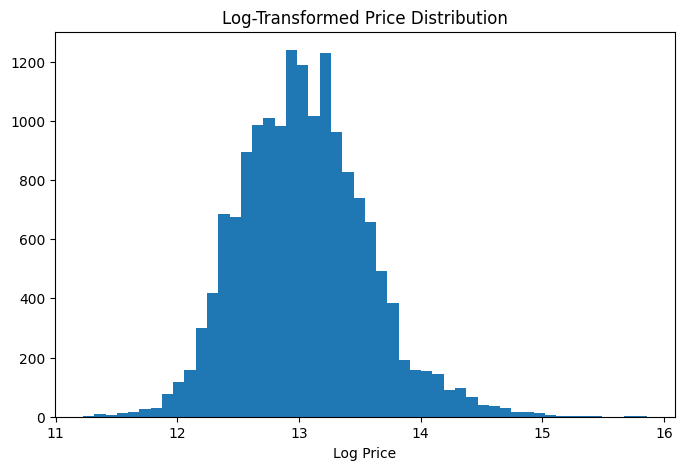

In [9]:
plt.figure(figsize=(8,5))
plt.hist(np.log1p(train['price']), bins=50)
plt.xlabel("Log Price")
plt.title("Log-Transformed Price Distribution")
plt.show()

In [10]:
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

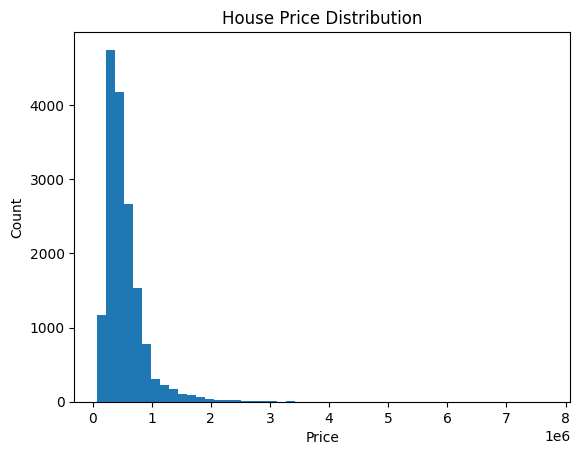

In [11]:
import matplotlib.pyplot as plt

plt.hist(train['price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("House Price Distribution")
plt.show()


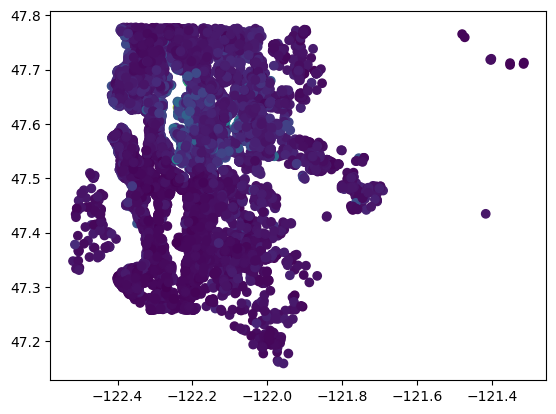

In [12]:
plt.scatter(train["long"], train["lat"], c=train["price"])


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

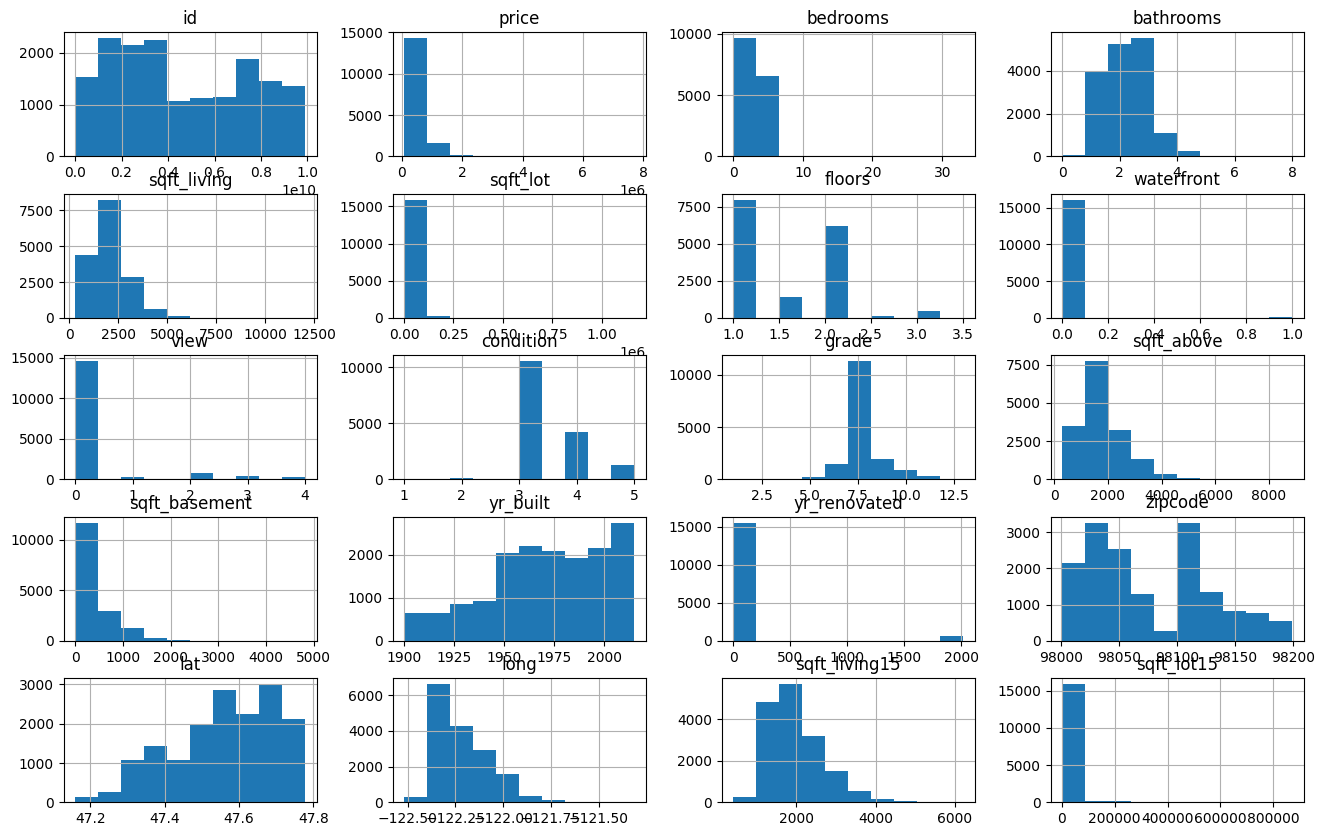

In [13]:
train.hist(figsize=(16,10))

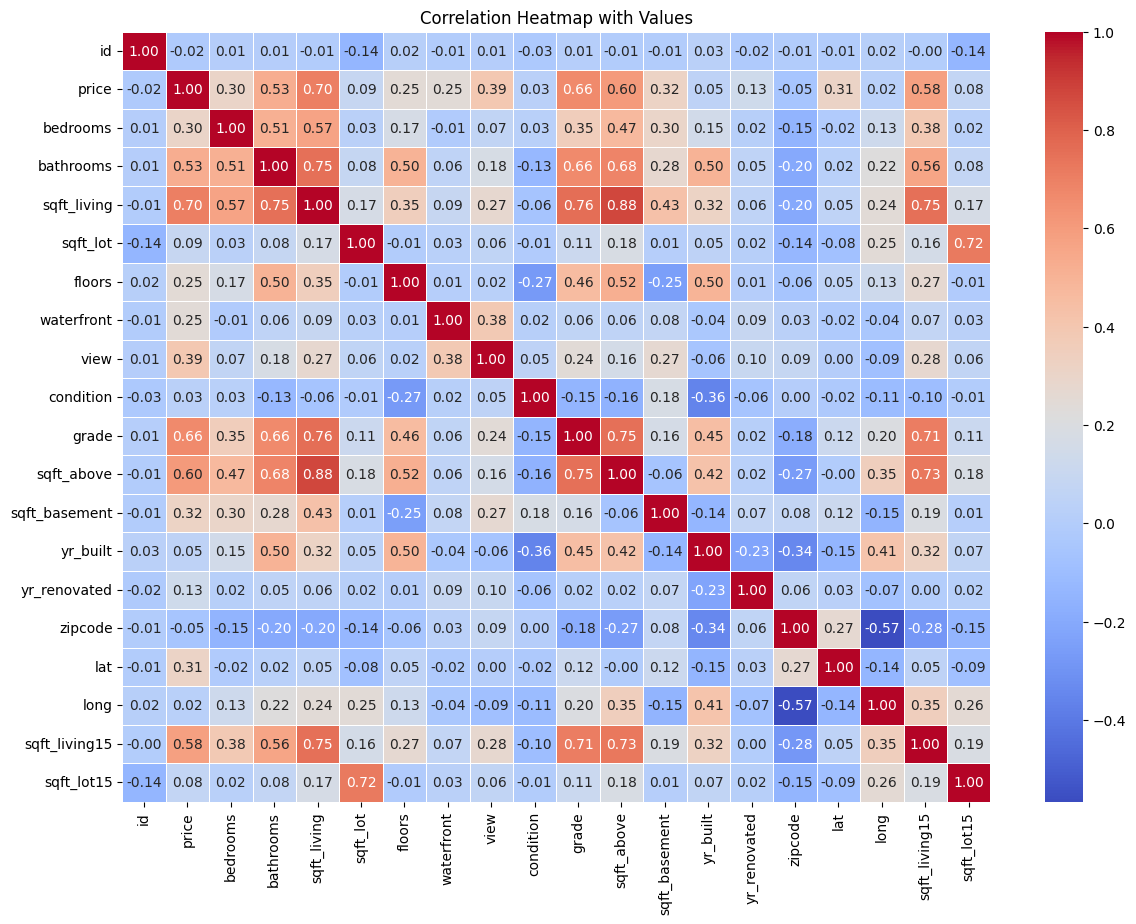

In [14]:
corr = train.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,          # 👈 writes correlation values
    fmt=".2f",           # 👈 2 decimal places
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap with Values")
plt.show()



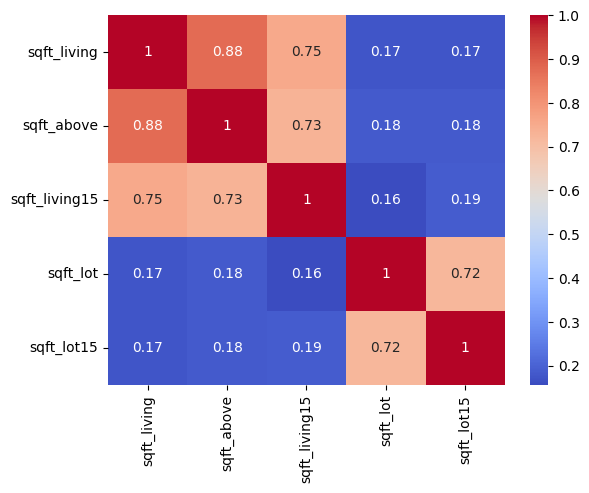

In [15]:
corr = train[['sqft_living','sqft_above','sqft_living15', 'sqft_lot','sqft_lot15']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
#        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#        'sqft_living15', 'sqft_lot15'],
#       dtype='object')


In [16]:
X = train[['sqft_living', 'sqft_basement']]

vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# vif
# 🧠 Why correlation ≠ VIF (important insight)

# corr(sqft_living, sqft_above) = 0.88 → high

# But VIF = inf because:

# living is an exact sum, not just “highly related”

# So:

# Correlation → strength of relationship

# VIF → redundancy / predictability

# 🎯 Final takeaway (save this)

# If VIF = inf → there is exact linear dependency → drop a feature.

# You did the right thing by dropping sqft_above.
# Now your linear models will behave properly, and XGBoost stays happy too.

# If you want, send the new VIF output after dropping — I’ll sanity-check it in one glanc

In [17]:
# Simple rule you can remember
# Drop features that repeat the same information, not features that add context.
# sqft_living15 adds context, not repetition.
features = [
    'sqft_living',
    'sqft_basement',
    'sqft_living15',
    'sqft_lot',
    'sqft_lot15'
]

X = train[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif


feature        VIF
0    sqft_living  18.036535
1  sqft_basement   1.844527
2  sqft_living15  15.587920
3       sqft_lot   2.404965
4     sqft_lot15   2.579710

In [18]:
train.skew(numeric_only=True).sort_values(ascending=False)


waterfront       11.852236
sqft_lot         11.407202
sqft_lot15        8.751604
yr_renovated      4.601306
price             4.033062
view              3.386537
bedrooms          2.419404
sqft_basement     1.571497
sqft_above        1.430353
sqft_living       1.378761
sqft_living15     1.094927
condition         1.027151
long              0.837556
grade             0.753435
floors            0.615319
bathrooms         0.461525
zipcode           0.402986
id                0.242147
yr_built         -0.472681
lat              -0.488362
dtype: float64

In [19]:
 pd.to_datetime(train['date'][0], format='%Y%m%dT%H%M%S').year

2015

In [20]:
pd.to_datetime(train['date'], format='%Y%m%dT%H%M%S').dt.year.value_counts()

date
2014    10990
2015     5219
Name: count, dtype: int64

In [21]:
# # df = df.drop(columns=['sqft_above'])
# # # df = df.drop(columns=['sqft_living15'])
# # Round bathrooms to nearest whole number
# df['bathrooms_rounded'] = df['bathrooms'].round(0).astype(int)
# #  not for Sometimes fractional floors indicate split levels (like 1.5 floors = a split-level house). If you care about that distinction, you might want to keep the fractional version too. Otherwise, rounding is perfectly fine for correlation or plots.

# If you want, I can show a quick w
# train.shape

In [22]:
train['date'] = pd.to_datetime(train['date'], format='%Y%m%dT%H%M%S')  # adjust format if needed
train['sale_year'] = train['date'].dt.year

In [23]:
# 2️⃣ Create house age
train['house_age'] = train['sale_year'] - train['yr_built']


In [24]:

# 3️⃣ Effective age considering renovation
train['effective_age'] = train['sale_year'] - train['yr_renovated']
train['effective_age'] = train['effective_age'].where(train['yr_renovated'] != 0, train['house_age'])


In [25]:
random_rows = train.sample(n=5, random_state=42)  # random_state for reproducibility
print(random_rows)

               id       date   price  bedrooms  bathrooms  sqft_living  \
4226   1853200190 2014-11-03  612000         4        2.5         2670   
11070   121059147 2014-11-04  392000         4        2.5         2300   
2450    123039176 2014-12-12  399888         4        1.0         2370   
1493   1862400518 2015-03-04  385000         3        2.0         1320   
3894   3622059155 2014-05-23  235000         4        2.5         1810   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
4226       5974     2.0           0     0  ...      1999             0   
11070     41167     2.0           0     0  ...      1988             0   
2450      30200     1.5           0     0  ...      1948             0   
1493       1297     3.0           0     0  ...      1995             0   
3894      39639     1.0           0     0  ...      1970             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  sale_year  \
4226     98034  47.7122 -122.231    

In [26]:
train.head

<bound method NDFrame.head of                id       date   price  bedrooms  bathrooms  sqft_living  \
0      9117000170 2015-05-05  268643         4       2.25         1810   
1      6700390210 2014-07-08  245000         3       2.50         1600   
2      7212660540 2015-01-15  200000         4       2.50         1720   
3      8562780200 2015-04-27  352499         2       2.25         1240   
4      7760400350 2014-12-05  232000         3       2.00         1280   
...           ...        ...     ...       ...        ...          ...   
16204  5272200045 2014-11-13  378000         3       1.50         1000   
16205  9578500790 2014-11-11  399950         3       2.50         3087   
16206  7202350480 2014-09-30  575000         3       2.50         2120   
16207  1723049033 2014-06-20  245000         1       0.75          380   
16208  6147650280 2015-03-25  315000         4       2.50         3130   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
0          9240     2.0           0     0  ...      1961             0   
1          2788     2.0           0     0  ...      1992             0   
2          8638     2.0           0     0  ...      1994             0   
3           705     2.0           0     0  ...      2009             0   
4         13356     1.0           0     0  ...      1994             0   
...         ...     ...         ...   ...  ...       ...           ...   
16204      6914     1.0           0     0  ...      1947             0   
16205      5002     2.0           0     0  ...      2014             0   
16206      4780     2.0           0     0  ...      2004             0   
16207     15000     1.0           0     0  ...      1963             0   
16208      5999     2.0           0     0  ...      2006             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  sale_year  \
0        98055  47.4362 -122.187           1660        9240       2015   
1        98031  47.4034 -122.187           1720        3605       2014   
2        98003  47.2704 -122.313           1870        7455       2015   
3        98027  47.5321 -122.073           1240         750       2015   
4        98042  47.3715 -122.074           1590        8071       2014   
...        ...      ...      ...            ...         ...        ...   
16204    98125  47.7144 -122.319           1000        6947       2014   
16205    98023  47.2974 -122.349           2927        5183       2014   
16206    98053  47.6810 -122.032           1690        2650       2014   
16207    98168  47.4810 -122.323           1170       15000       2014   
16208    98042  47.3837 -122.099           3020        5997       2015   

       house_age  effective_age  
0             54             54  
1             22             22  
2             21             21  
3              6              6  
4             20             20  
...          ...            ...  
16204         67             67  
16205          0              0  
16206         10             10  
16207         51             51  
16208          9              9  

[16209 rows x 24 columns]>

In [27]:
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop("price")

In [28]:
for column in train.columns:
    if train[column].dtype != 'object':
      print(train[column].value_counts())


id
1545800290    2
4031000520    2
3523069060    2
1922059278    2
2621600015    2
             ..
7701930050    1
2723069129    1
205000050     1
2597000006    1
114100131     1
Name: count, Length: 16110, dtype: int64
date
2014-06-23    115
2014-06-25     99
2015-03-25     94
2015-04-21     93
2014-06-26     93
             ... 
2014-11-28      1
2014-12-27      1
2014-11-02      1
2015-05-15      1
2014-11-15      1
Name: count, Length: 366, dtype: int64
price
450000    135
350000    134
425000    121
550000    113
325000    111
         ... 
283700      1
677900      1
710500      1
465500      1
366750      1
Name: count, Length: 3428, dtype: int64
bedrooms
3     7380
4     5128
2     2098
5     1213
6      197
1      142
7       26
8        9
0        8
9        5
10       2
33       1
Name: count, dtype: int64
bathrooms
2.50    4064
1.00    2891
1.75    2283
2.25    1532
2.00    1424
1.50    1094
2.75     913
3.00     547
3.50     544
3.25     441
3.75     109
4.00     104
4.50 

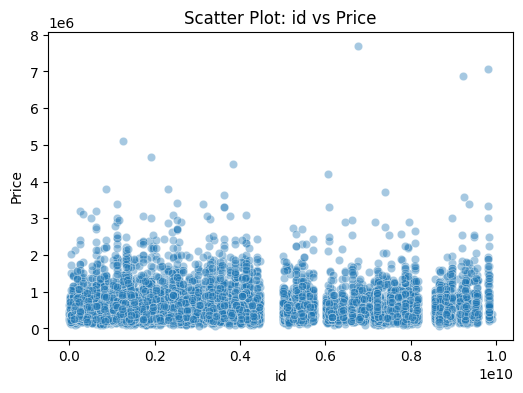

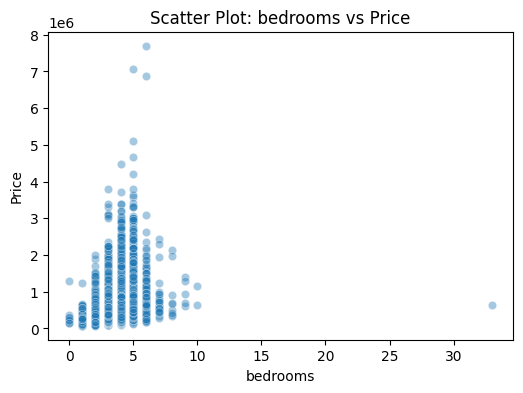

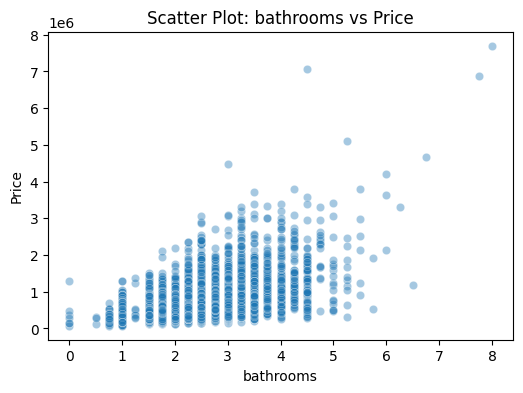

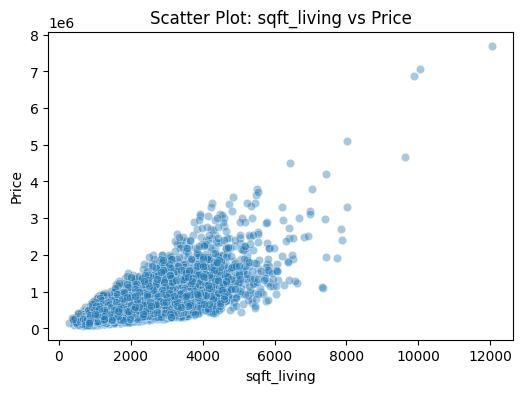

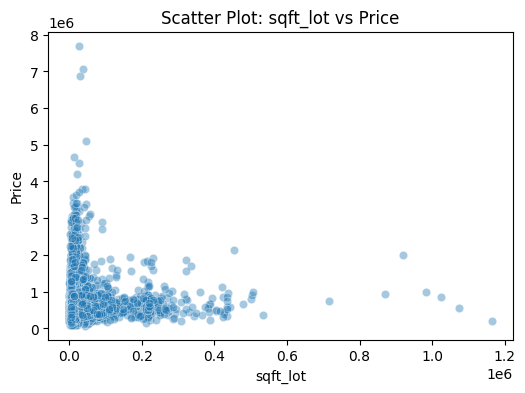

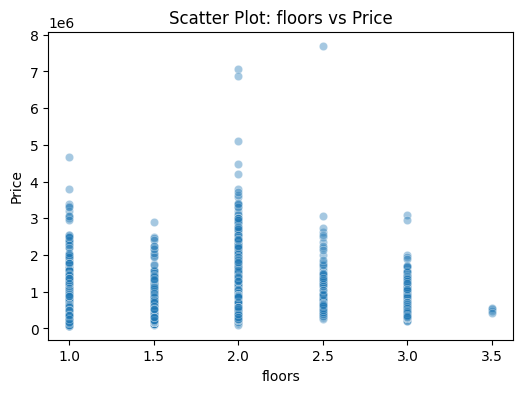

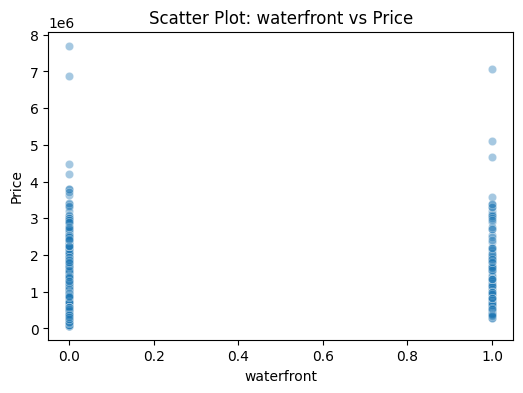

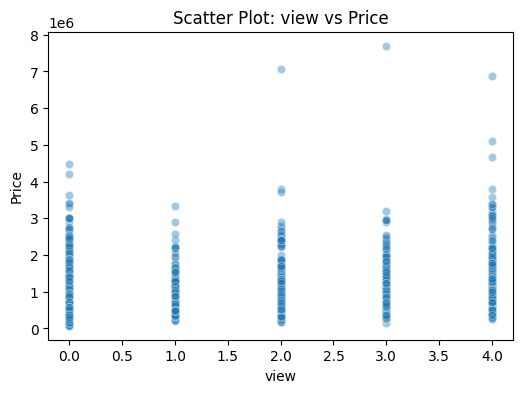

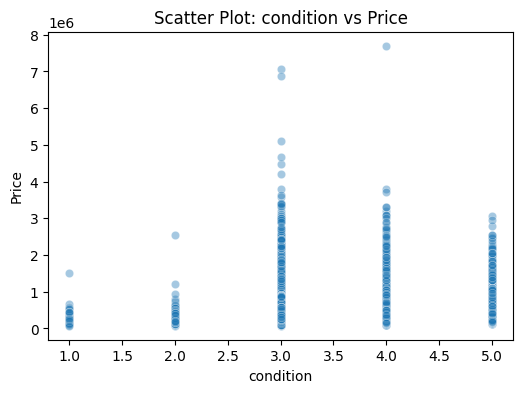

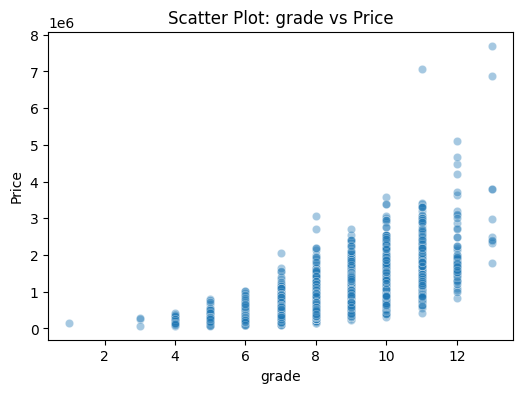

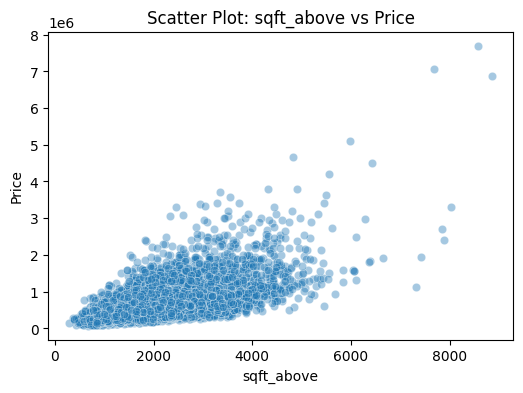

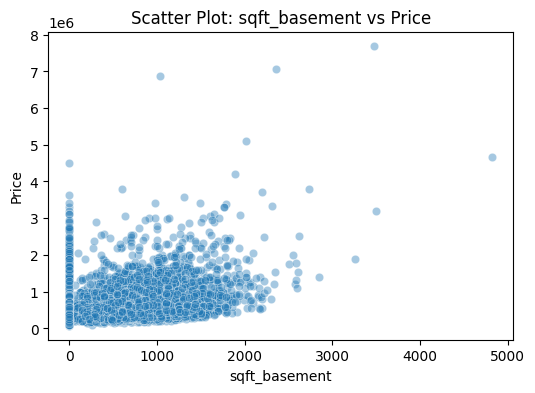

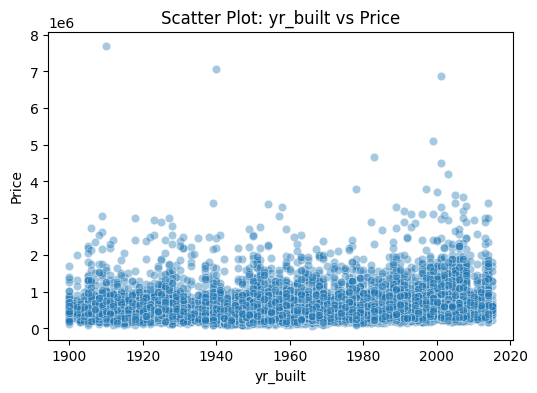

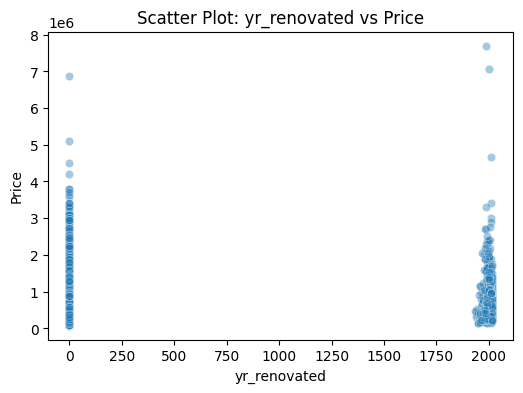

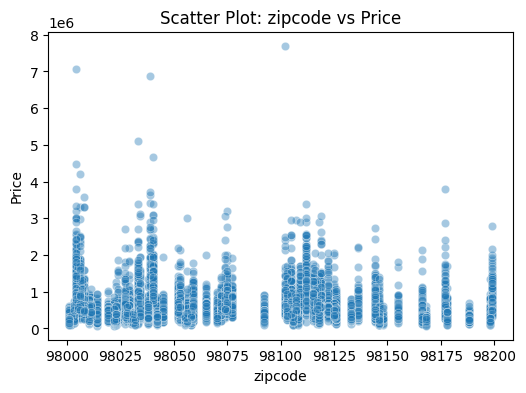

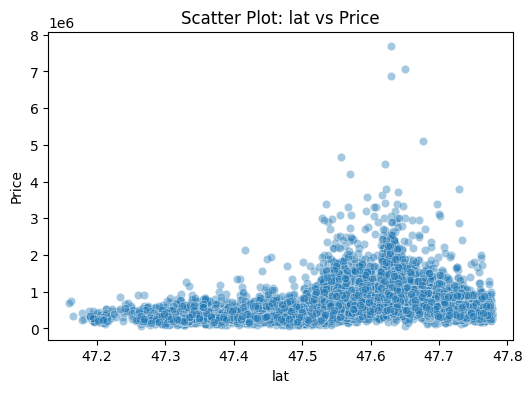

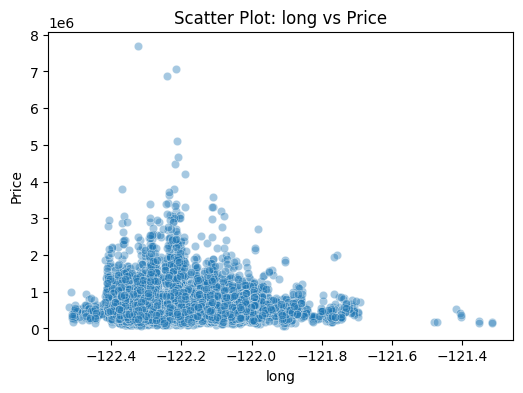

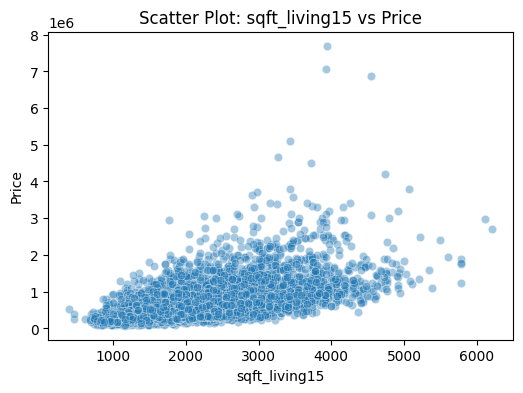

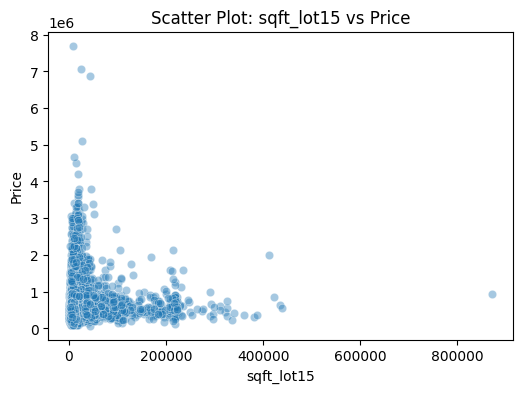

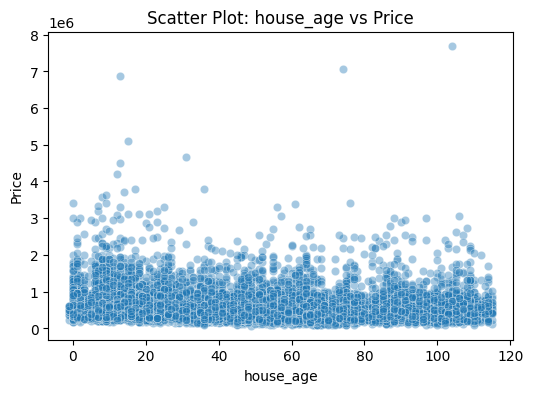

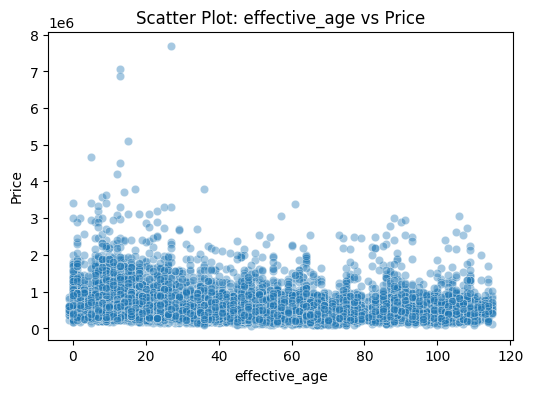

In [29]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[col], y=train["price"], alpha=0.4)
    plt.title(f"Scatter Plot: {col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

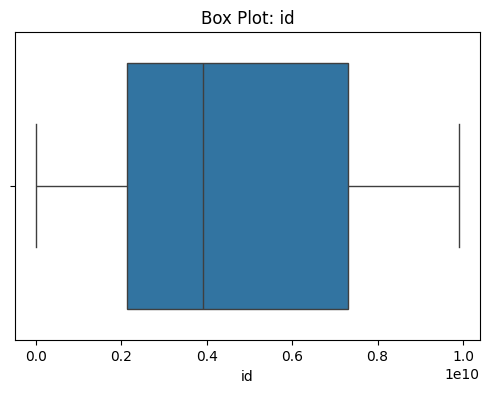

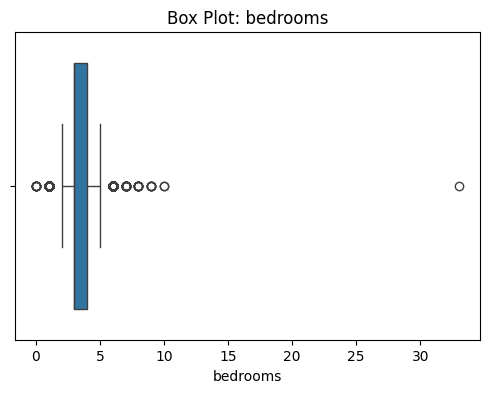

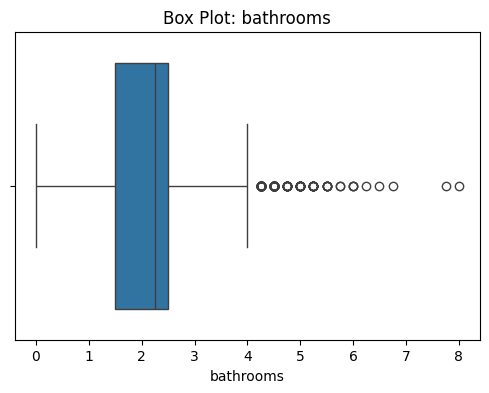

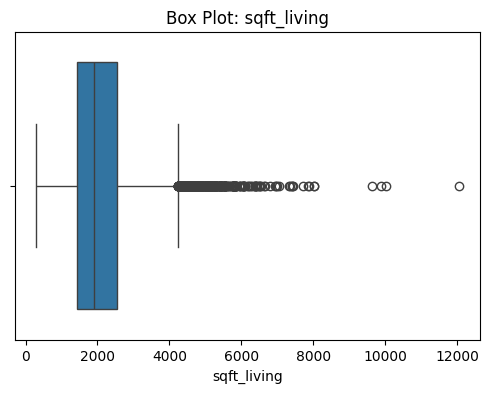

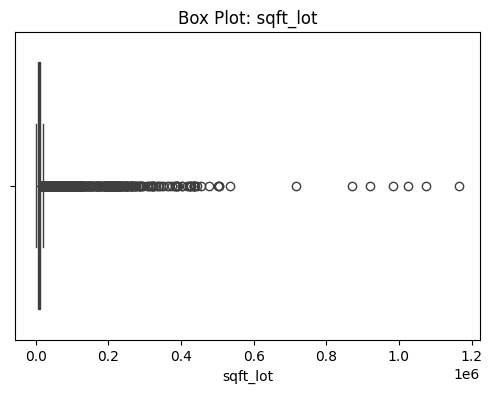

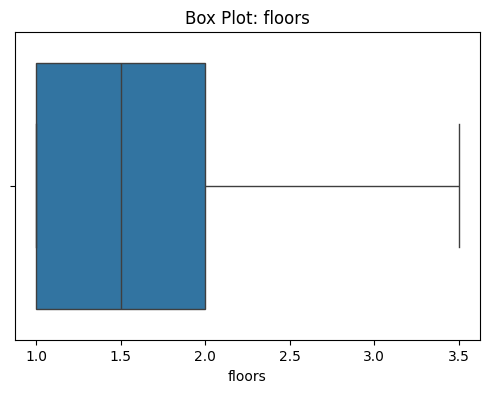

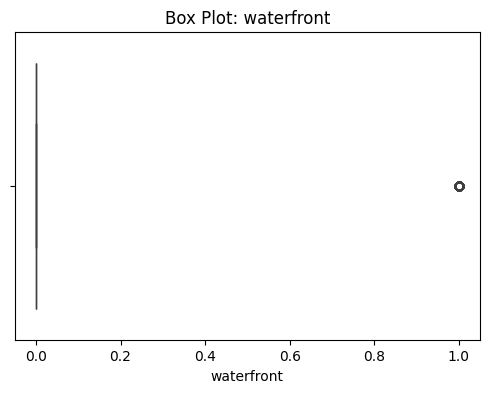

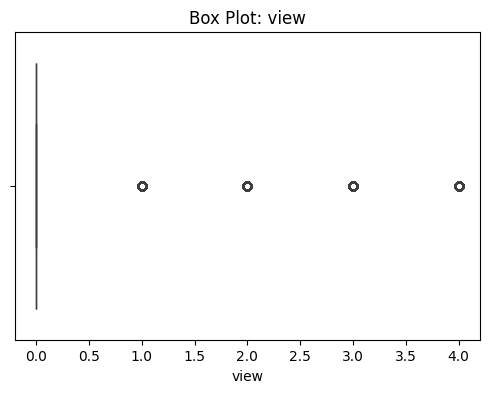

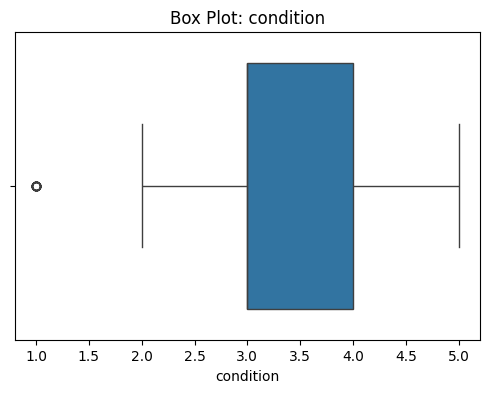

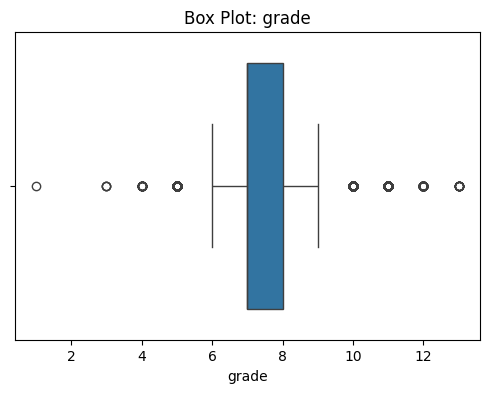

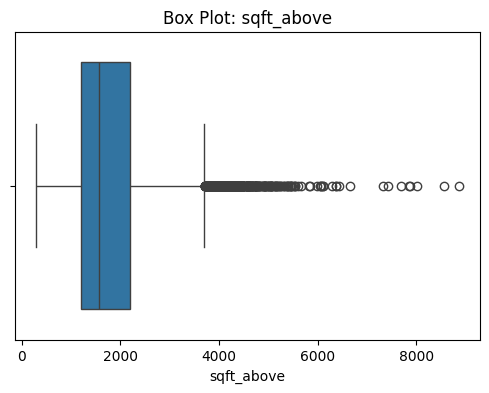

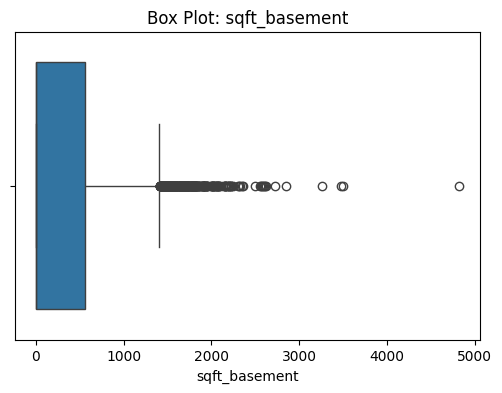

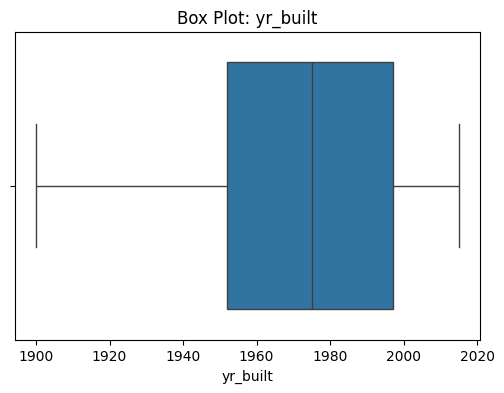

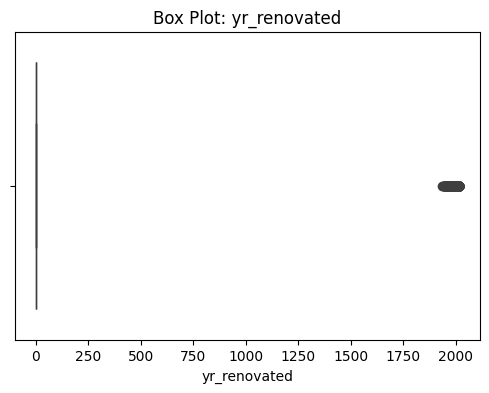

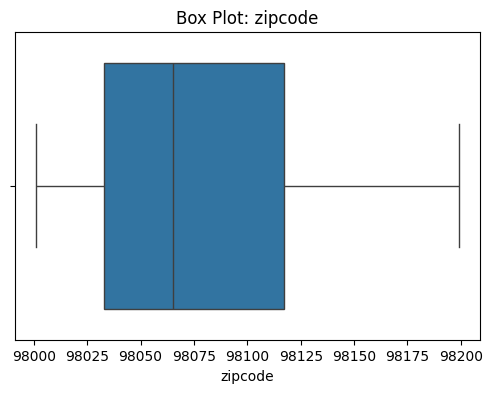

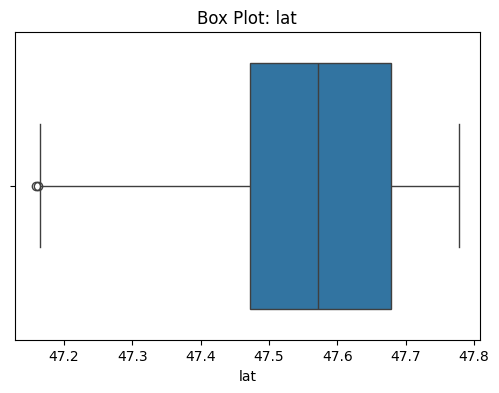

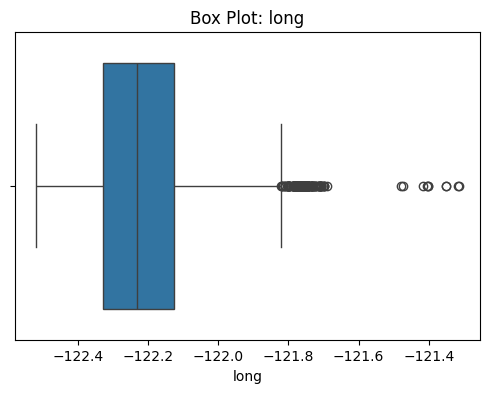

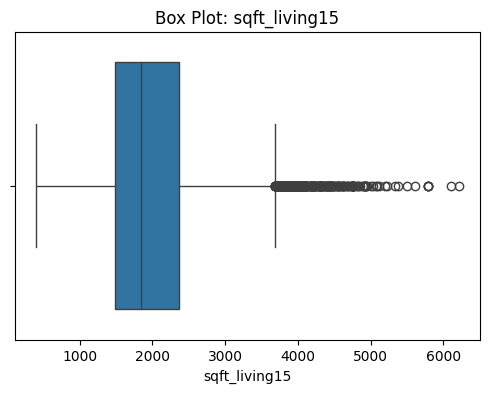

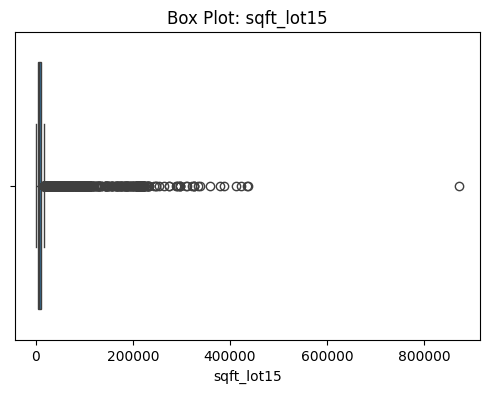

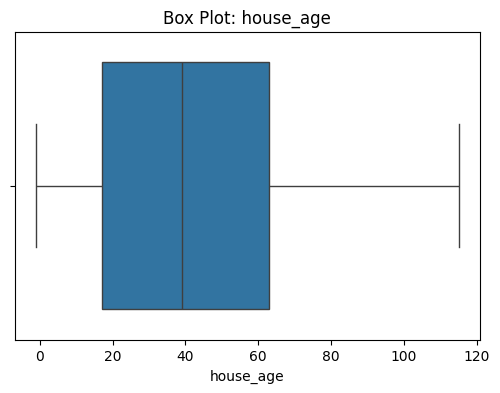

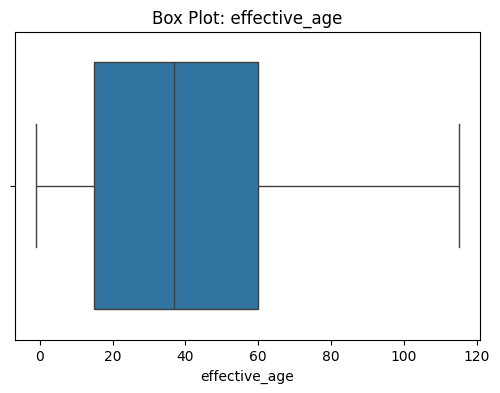

In [30]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train[col])
    plt.title(f"Box Plot: {col}")
    plt.show()


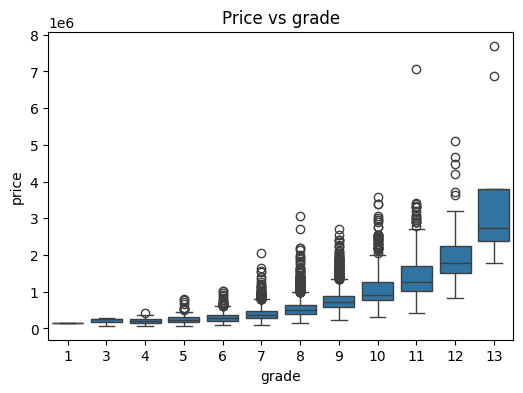

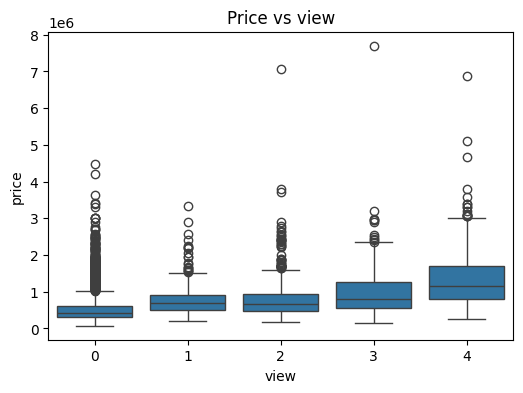

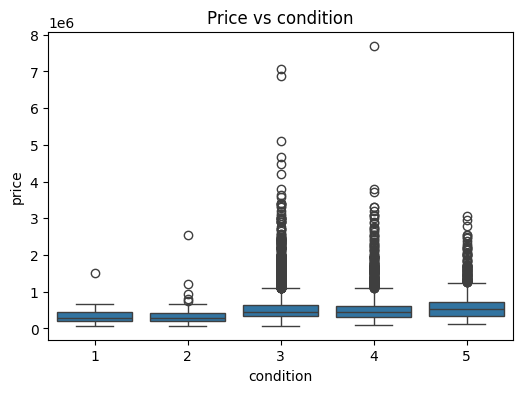

In [31]:
cat_cols = ["grade", "view", "condition"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train[col], y=train["price"])
    plt.title(f"Price vs {col}")
    plt.show()


In [32]:
feature = "sqft_living"

x_thresh = train[feature].quantile(0.99)
y_thresh = train["price"].quantile(0.99)

outliers = train[
    (train[feature] > x_thresh) &
    (train["price"] > y_thresh)
][["id", feature, "price"]]

outliers


id  sqft_living    price
625    1118002000         6390  2466350
731    3623500205         5030  2450000
1043   2397101606         5540  2630000
1096   8964800330         5090  3000000
1207   2303900100         5510  3800000
1359   4139420190         5310  2480000
1499   9808700762        10040  7062500
1680   6447300365         5190  2900000
1779   6072800246         8020  3300000
2027   2311400056         5230  1987500
2115   9208900037         9890  6885000
2159   1118000301         5780  2890000
2526   3625049042         5490  3635000
2617   3303850390         7400  2983000
2704    125069038         5150  2140000
3014   9808100100         5370  3000000
3837   7935000280         5210  2195000
4359    853200010         7050  3800000
4533   1923000260         6200  1959000
4654   6613000935         5300  2555000
4882   2525049148         5450  3418800
4930   7397300170         5550  3710000
4962   6762700020        12050  7700000
5112   9808100150         5350  3345000
5388   2303900090         5760  2880500
5864   5249800010         6410  2725000
6430    624069108         7000  3200000
6851   3262300555         6500  2458000
7193   9831200500         6810  2479000
7638   2424049029         6980  3100000
8146   8085400376         5050  2320000
8247   1725059127         5550  2350000
8672   1725059316         6330  2385000
8751    622049114         5403  2125000
8820   9471200200         5040  2532000
8882   4131900042         6490  2000000
9073   3835500195         6430  4489000
9243   7768700300         5540  2575000
9264   1247600105         8010  5110800
9515   2524069078         7850  2700000
10067  5316100920         5150  2250000
10258  1338800425         5110  2140000
10412  1924059029         9640  4668000
10455  4139300135         5780  2321000
11410  6065300370         7440  4208000
11875  1925059254         6670  2998000
11907  2524049166         6240  2950000
11992  7960900060         5050  2900000
12090  5710000005         5060  2150000
12142   824059305         5840  2200000
12262  3629940160         5840  2200000
12987  2426039123         7880  2415000
13024  5536100005         5310  2300000
13776  1118001408         5410  2544750
14068  3625059043         6200  3300000
14095  8835800350         7420  1950000
14778  3377900195         6930  2525000
14963  7855801670         5180  2250000
15318  2024069008         5990  2200000
16147  9362000040         5230  3400000

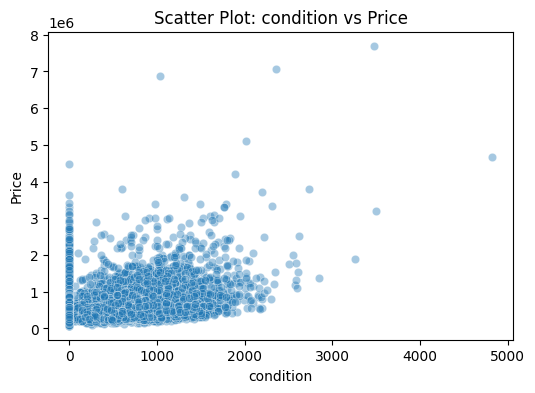

In [33]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train['sqft_basement'], y=train["price"], alpha=0.4)
    plt.title(f"Scatter Plot: {col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

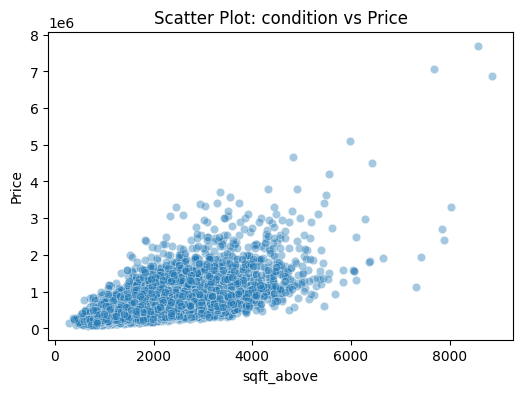

In [34]:

      plt.figure(figsize=(6,4))
      sns.scatterplot(x=train['sqft_above'], y=train["price"], alpha=0.4)
      plt.title(f"Scatter Plot: {col} vs Price")
      plt.xlabel("sqft_above")
      plt.ylabel("Price")
      plt.show()

In [35]:
train.loc[train["price"] > 5e6]

id       date    price  bedrooms  bathrooms  sqft_living  \
1499  9808700762 2014-06-11  7062500         5       4.50        10040   
2115  9208900037 2014-09-19  6885000         6       7.75         9890   
4962  6762700020 2014-10-13  7700000         6       8.00        12050   
9264  1247600105 2014-10-20  5110800         5       5.25         8010   

      sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
1499     37325     2.0           1     2  ...      1940          2001   
2115     31374     2.0           0     4  ...      2001             0   
4962     27600     2.5           0     3  ...      1910          1987   
9264     45517     2.0           1     4  ...      1999             0   

      zipcode      lat     long  sqft_living15  sqft_lot15  sale_year  \
1499    98004  47.6500 -122.214           3930       25449       2014   
2115    98039  47.6305 -122.240           4540       42730       2014   
4962    98102  47.6298 -122.323           3940        8800       2014   
9264    98033  47.6767 -122.211           3430       26788       2014   

      house_age  effective_age  
1499         74             13  
2115         13             13  
4962        104             27  
9264         15             15  

[4 rows x 24 columns]

In [36]:
train.loc[train["price"] > 5e6, ["id", "price"]]


id    price
1499  9808700762  7062500
2115  9208900037  6885000
4962  6762700020  7700000
9264  1247600105  5110800

In [37]:
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop("price")
numeric_cols

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'effective_age'],
      dtype='object')

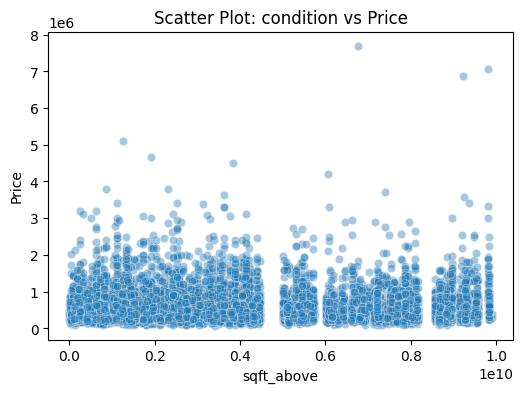

In [38]:
      plt.figure(figsize=(6,4))
      sns.scatterplot(x=train['id'], y=train["price"], alpha=0.4)
      plt.title(f"Scatter Plot: {col} vs Price")
      plt.xlabel("sqft_above")
      plt.ylabel("Price")
      plt.show()

In [39]:
train.loc[train["price"] > 5e6]


id       date    price  bedrooms  bathrooms  sqft_living  \
1499  9808700762 2014-06-11  7062500         5       4.50        10040   
2115  9208900037 2014-09-19  6885000         6       7.75         9890   
4962  6762700020 2014-10-13  7700000         6       8.00        12050   
9264  1247600105 2014-10-20  5110800         5       5.25         8010   

      sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
1499     37325     2.0           1     2  ...      1940          2001   
2115     31374     2.0           0     4  ...      2001             0   
4962     27600     2.5           0     3  ...      1910          1987   
9264     45517     2.0           1     4  ...      1999             0   

      zipcode      lat     long  sqft_living15  sqft_lot15  sale_year  \
1499    98004  47.6500 -122.214           3930       25449       2014   
2115    98039  47.6305 -122.240           4540       42730       2014   
4962    98102  47.6298 -122.323           3940        8800       2014   
9264    98033  47.6767 -122.211           3430       26788       2014   

      house_age  effective_age  
1499         74             13  
2115         13             13  
4962        104             27  
9264         15             15  

[4 rows x 24 columns]

In [41]:
filtered = train.loc[
    (train["price"] > 4e6) &
    (
        (train["bedrooms"] > 10) |
        (train["bathrooms"] > 6) |
        (train["sqft_living"] > 8000) |
        (train["sqft_lot"] > 0.6e6) |
        (train["grade"] >= 4) |
        (train["condition"] >= 4) |
        (train["sqft_above"] >= 7000) |
        (train["sqft_basement"] >= 3000) |
        (train["sqft_living15"] >= 6000)
    )
]
filtered

id       date    price  bedrooms  bathrooms  sqft_living  \
1499   9808700762 2014-06-11  7062500         5       4.50        10040   
2115   9208900037 2014-09-19  6885000         6       7.75         9890   
4962   6762700020 2014-10-13  7700000         6       8.00        12050   
9073   3835500195 2014-06-18  4489000         4       3.00         6430   
9264   1247600105 2014-10-20  5110800         5       5.25         8010   
10412  1924059029 2014-06-17  4668000         5       6.75         9640   
11410  6065300370 2015-05-06  4208000         5       6.00         7440   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
1499      37325     2.0           1     2  ...      1940          2001   
2115      31374     2.0           0     4  ...      2001             0   
4962      27600     2.5           0     3  ...      1910          1987   
9073      27517     2.0           0     0  ...      2001             0   
9264      45517     2.0           1     4  ...      1999             0   
10412     13068     1.0           1     4  ...      1983          2009   
11410     21540     2.0           0     0  ...      2003             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  sale_year  \
1499     98004  47.6500 -122.214           3930       25449       2014   
2115     98039  47.6305 -122.240           4540       42730       2014   
4962     98102  47.6298 -122.323           3940        8800       2014   
9073     98004  47.6208 -122.219           3720       14592       2014   
9264     98033  47.6767 -122.211           3430       26788       2014   
10412    98040  47.5570 -122.210           3270       10454       2014   
11410    98006  47.5692 -122.189           4740       19329       2015   

       house_age  effective_age  
1499          74             13  
2115          13             13  
4962         104             27  
9073          13             13  
9264          15             15  
10412         31              5  
11410         12             12  

[7 rows x 24 columns]

In [42]:
filtered = train.loc[ (train["price"] > 1.5e6) & (train["condition"].isin([1, 2]))]
filtered
            # (train["sqft_above"] >= 7000) |
            # (train["sqft_basement"] >= 3000) |
            # (train["sqft_living15"] >= 6000) |
            # (train["sqft_lot15"] >= 0.4e6)


id       date    price  bedrooms  bathrooms  sqft_living  \
4654  6613000935 2014-05-13  2555000         4        2.5         5300   

      sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
4654     26211     2.0           1     2  ...      1923             0   

      zipcode     lat     long  sqft_living15  sqft_lot15  sale_year  \
4654    98105  47.661 -122.269           3890       19281       2014   

      house_age  effective_age  
4654         91             91  

[1 rows x 24 columns]

In [43]:
filtered = train.loc[(train["price"] >.4e6) & (train["sqft_lot15"] >= 0.4e6)]
filtered

id       date    price  bedrooms  bathrooms  sqft_living  \
1928   1550000463 2014-08-26   637000         4       3.50         3080   
5289   3226079059 2014-10-19   549950         3       1.75         2930   
10865  2624089007 2015-03-20  1998000         2       2.50         3900   
13213   225079036 2015-01-07   937500         4       4.00         5545   
14344  1020069042 2014-10-01   858000         4       3.50         4370   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
1928     118918     2.0           0     0  ...      2008             0   
5289     266587     2.0           0     0  ...      1995             0   
10865    920423     2.0           0     0  ...      2009             0   
13213    871200     2.0           0     0  ...      2003             0   
14344    422967     1.0           0     2  ...      1978             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  sale_year  \
1928     98019  47.7721 -121.924           1830      434728       2014   
5289     98014  47.6991 -121.947           2700      438213       2014   
10865    98065  47.5371 -121.756           2720      411962       2015   
13213    98014  47.6760 -121.882           3420      871200       2015   
14344    98022  47.2332 -122.029           3260      422967       2014   

       house_age  effective_age  
1928           6              6  
5289          19             19  
10865          6              6  
13213         12             12  
14344         36             36  

[5 rows x 24 columns]

In [44]:
filtered = train.loc[
            (train["sqft_lot"] > 0.6e6) |
            (train["bathrooms"] > 6) |
            (train["bedrooms"] > 10) |
            (train["sqft_above"] >= 7000) |
            (train["sqft_basement"] >= 3000) |
            (train["sqft_living15"] >= 6000)
]
filtered

id       date    price  bedrooms  bathrooms  sqft_living  \
1499   9808700762 2014-06-11  7062500         5       4.50        10040   
1779   6072800246 2014-07-02  3300000         5       6.25         8020   
2115   9208900037 2014-09-19  6885000         6       7.75         9890   
2617   3303850390 2014-12-12  2983000         5       5.50         7400   
3193   2402100895 2014-06-25   640000        33       1.75         1620   
4962   6762700020 2014-10-13  7700000         6       8.00        12050   
6212   3326079016 2015-05-04   190000         2       1.00          710   
6430    624069108 2014-08-12  3200000         4       3.25         7000   
8004   7767000060 2014-09-12  1900000         5       4.25         6510   
8056   2623069031 2014-05-21   542500         5       3.25         3010   
8139    722069232 2014-09-05   998000         4       3.25         3770   
9515   2524069078 2015-01-22  2700000         4       4.00         7850   
10412  1924059029 2014-06-17  4668000         5       6.75         9640   
10839  2323089009 2015-01-19   855000         4       3.50         4030   
10865  2624089007 2015-03-20  1998000         2       2.50         3900   
11050  3023069166 2014-07-08  1135250         5       4.00         7320   
12285   619079096 2015-04-06   750000         3       2.50         2350   
12987  2426039123 2015-01-30  2415000         5       4.75         7880   
13213   225079036 2015-01-07   937500         4       4.00         5545   
13353   424069279 2015-03-28  1180000         6       6.50         6260   
14095  8835800350 2015-01-12  1950000         4       3.25         7420   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
1499      37325     2.0           1     2  ...      1940          2001   
1779      21738     2.0           0     0  ...      2001             0   
2115      31374     2.0           0     4  ...      2001             0   
2617      18898     2.0           0     3  ...      2001             0   
3193       6000     1.0           0     0  ...      1947             0   
4962      27600     2.5           0     3  ...      1910          1987   
6212    1164794     1.0           0     0  ...      1915             0   
6430      28206     1.0           1     4  ...      1991             0   
8004      16471     2.0           0     3  ...      1980             0   
8056    1074218     1.5           0     0  ...      1931             0   
8139     982998     2.0           0     0  ...      1992             0   
9515      89651     2.0           0     0  ...      2006             0   
10412     13068     1.0           1     4  ...      1983          2009   
10839   1024068     2.0           0     0  ...      2006             0   
10865    920423     2.0           0     0  ...      2009             0   
11050    217800     2.0           0     0  ...      1992             0   
12285    715690     1.5           0     0  ...      1979             0   
12987     24250     2.0           0     2  ...      1996             0   
13213    871200     2.0           0     0  ...      2003             0   
13353     10955     2.0           0     0  ...      2007             0   
14095    167869     2.0           0     3  ...      2002             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  sale_year  \
1499     98004  47.6500 -122.214           3930       25449       2014   
1779     98006  47.5675 -122.189           4160       18969       2014   
2115     98039  47.6305 -122.240           4540       42730       2014   
2617     98006  47.5431 -122.112           6110       26442       2014   
3193     98103  47.6878 -122.331           1330        4700       2014   
4962     98102  47.6298 -122.323           3940        8800       2014   
6212     98014  47.6888 -121.909           1680       16730       2015   
6430     98075  47.5928 -122.086           4913       14663       2014   
8004     98040  47.5758 -122.242           4480       16471       201

In [45]:
flags = (
    (train["bedrooms"] > 10) |
    (train["bathrooms"] > 6) |
    (train["sqft_living"] > 8000)
)

train.loc[flags, ["id", "price", "sqft_living", "bedrooms", "bathrooms"]]


id    price  sqft_living  bedrooms  bathrooms
1499   9808700762  7062500        10040         5       4.50
1779   6072800246  3300000         8020         5       6.25
2115   9208900037  6885000         9890         6       7.75
3193   2402100895   640000         1620        33       1.75
4962   6762700020  7700000        12050         6       8.00
9264   1247600105  5110800         8010         5       5.25
10412  1924059029  4668000         9640         5       6.75
13353   424069279  1180000         6260         6       6.50

EDA EDA EDA EDA EDA EDA EDA EDA EDAEDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA EDA

In [46]:
caps = {}
# percentile capping

for col in [
    "sqft_living", "sqft_lot", "sqft_above",
    "sqft_basement", "sqft_living15", "sqft_lot15"
]:
    caps[col] = train[col].quantile(0.995)

for col, cap in caps.items():
    train[col] = train[col].clip(upper=cap)
    test[col] = test[col].clip(upper=cap)

In [47]:
train = train[~((train["bathrooms"] == 0) & (train["bedrooms"] > 0))]

In [50]:
train["bathrooms"] = train["bathrooms"].clip(upper=6)
test["bathrooms"] = test["bathrooms"].clip(upper=6)

/tmp/ipython-input-876649974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["bathrooms"] = train["bathrooms"].clip(upper=6)


In [51]:

train["bedrooms"] = train["bedrooms"].clip(upper=10)
test["bedrooms"] = test["bedrooms"].clip(upper=10)


/tmp/ipython-input-2232279439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["bedrooms"] = train["bedrooms"].clip(upper=10)


In [52]:
for df in [train, test]:
    df["date"] = pd.to_datetime(
        df["date"],
        format="%Y%m%dT%H%M%S",
        errors="coerce"
    )


/tmp/ipython-input-2422228405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(


In [53]:
train["date"].dtype


dtype('<M8[ns]')

In [54]:

for df in [train, test]:
    df["sale_year"] = df["date"].dt.year
    df["sale_month"] = df["date"].dt.month


/tmp/ipython-input-228099159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sale_year"] = df["date"].dt.year
/tmp/ipython-input-228099159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sale_month"] = df["date"].dt.month


In [55]:
for df in [train, test]:
    df["sale_year"] = df["date"].dt.year
    df["sale_month"] = df["date"].dt.month


/tmp/ipython-input-392508038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sale_year"] = df["date"].dt.year
/tmp/ipython-input-392508038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sale_month"] = df["date"].dt.month


In [56]:
train.drop(columns=["date"], inplace=True)
test.drop(columns=["date"], inplace=True)


/tmp/ipython-input-3940687026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=["date"], inplace=True)


In [91]:
for df in [train, test]:
    df["house_age"] = df["sale_year"] - df["yr_built"]



KeyError: 'sale_year'

In [94]:
train["house_age"] = train["house_age"].clip(lower=0)
test["house_age"] = test["house_age"].clip(lower=0)

/tmp/ipython-input-3393791769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["house_age"] = train["house_age"].clip(lower=0)


In [58]:


# for df in [train, test]:
#     df["years_since_renov"] = df["sale_year"] - df["yr_renovated"]
#     df.loc[df["yr_renovated"] == 0, "years_since_renov"] = df["house_age"]


/tmp/ipython-input-1589931413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["years_since_renov"] = df["sale_year"] - df["yr_renovated"]


In [59]:

for df in [train, test]:
    df["is_renovated"] = (df["yr_renovated"] > 0).astype(int)


/tmp/ipython-input-3739498053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_renovated"] = (df["yr_renovated"] > 0).astype(int)


In [77]:
cols_to_drop = ['id', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated',
                'sqft_living15', 'sale_year', 'years_since_renov','effective_age','sale_month']

# Drop multiple columns inplace safely
train.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
test.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

/tmp/ipython-input-759198925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')


In [73]:
zipcode_mean = train.groupby("zipcode")["price"].mean()

train["zipcode_te"] = train["zipcode"].map(zipcode_mean)
test["zipcode_te"] = test["zipcode"].map(zipcode_mean)

# Handle unseen zipcodes in test
global_mean = train["price"].mean()
test["zipcode_te"] = test["zipcode_te"].fillna(global_mean)

# Drop original zipcode
train.drop(columns=["zipcode"], inplace=True)
test.drop(columns=["zipcode"], inplace=True)


KeyError: 'zipcode'

log transformation

In [99]:
train["price"] = np.log1p(train["price"])


/tmp/ipython-input-1177523459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["price"] = np.log1p(train["price"])


In [103]:
train["sqft_above"] = np.log1p(train["sqft_above"])
test["sqft_above"] = np.log1p(test["sqft_above"])


/tmp/ipython-input-2983594662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["sqft_above"] = np.log1p(train["sqft_above"])


In [104]:
train["sqft_basement"] = np.log1p(train["sqft_basement"])
test["sqft_basement"] = np.log1p(test["sqft_basement"])


/tmp/ipython-input-1390804451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["sqft_basement"] = np.log1p(train["sqft_basement"])


In [105]:
train["sqft_lot15"] = np.log1p(train["sqft_lot15"])
test["sqft_lot15"] = np.log1p(test["sqft_lot15"])


/tmp/ipython-input-2111526888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["sqft_lot15"] = np.log1p(train["sqft_lot15"])


In [106]:
train["zipcode_te"] = np.log1p(train["zipcode_te"])
test["zipcode_te"] = np.log1p(test["zipcode_te"])


/tmp/ipython-input-92425732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["zipcode_te"] = np.log1p(train["zipcode_te"])


In [62]:
train.shape

(16206, 17)

In [78]:
columns_list = train.columns.tolist()
print(train.shape)
print(columns_list)

(16206, 16)
['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_lot15', 'house_age', 'is_renovated', 'zipcode_te']


In [109]:
train.head()

price  bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0  12.501142         4       2.25     2.0           0     0          3      7   
1  12.409018         3       2.50     2.0           0     0          4      7   
2  12.206078         4       2.50     2.0           0     0          3      8   
3  12.772806         2       2.25     2.0           0     0          3      7   
4  12.354497         3       2.00     1.0           0     0          3      7   

   sqft_above  sqft_basement      lat     long  sqft_lot15  house_age  \
0    7.501634        0.00000  47.4362 -122.187    9.131405         54   
1    7.378384        0.00000  47.4034 -122.187    8.190354         22   
2    7.450661        0.00000  47.2704 -122.313    8.916774         21   
3    7.048386        4.51086  47.5321 -122.073    6.621406          6   
4    7.155396        0.00000  47.3715 -122.074    8.996157         20   

   is_renovated  zipcode_te  
0             0   12.628271  
1             0   12.621663  
2             0   12.579669  
3             0   13.335357  
4             0   12.657948

In [65]:
# test["sale_year"].isna().sum()


In [81]:
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop("price")
numeric_cols

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_lot15',
       'house_age', 'is_renovated', 'zipcode_te'],
      dtype='object')

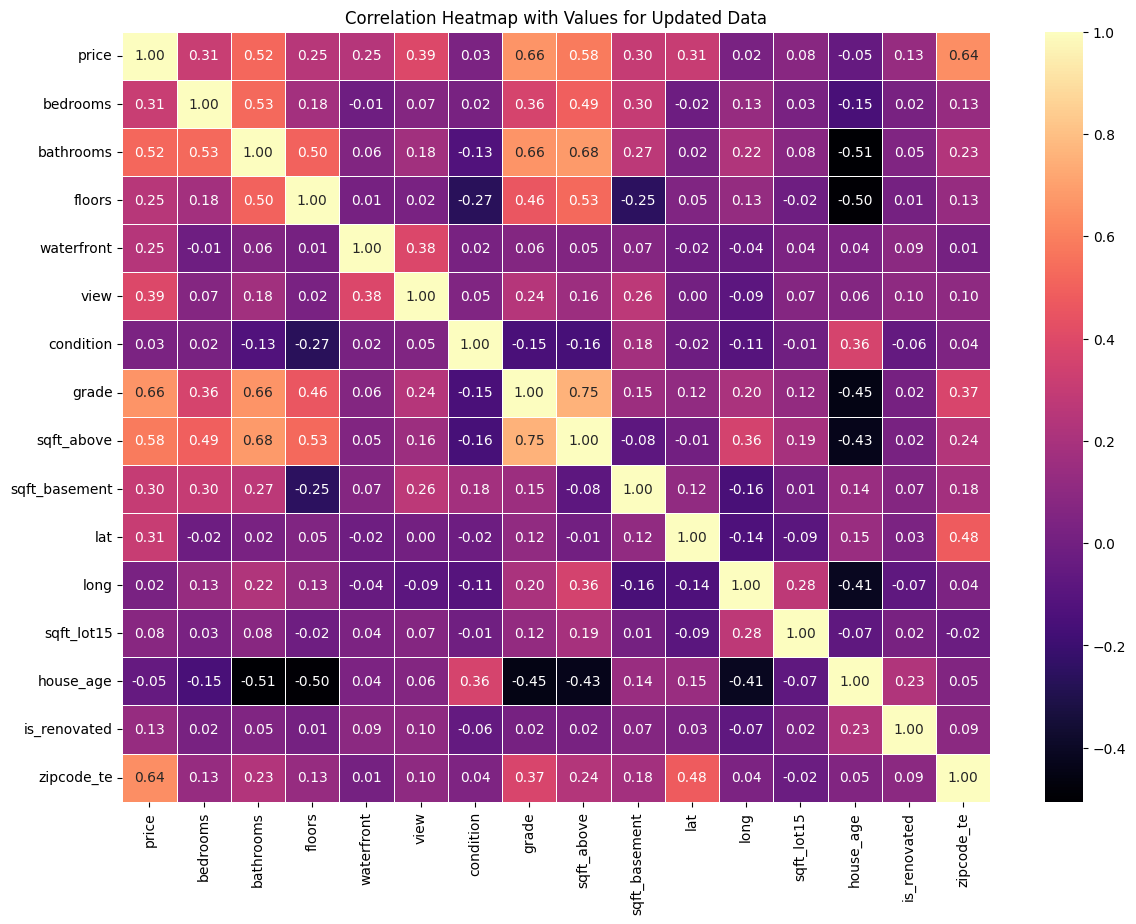

In [80]:
corr = train.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="magma",
    linewidths=0.5
)
plt.title("Correlation Heatmap with Values for Updated Data")
plt.show()

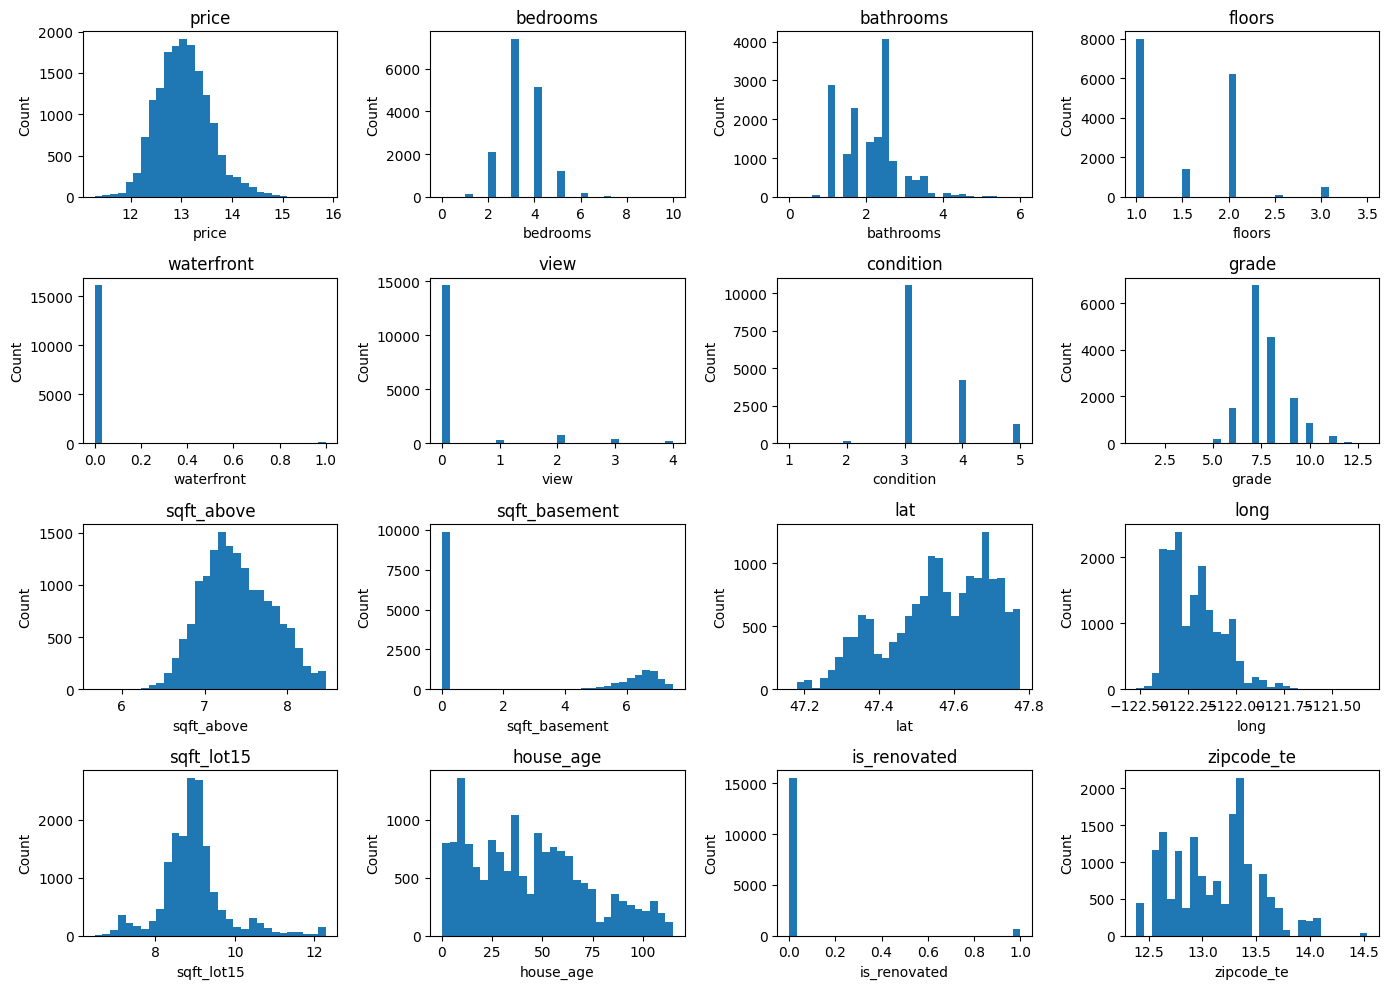

In [107]:

cols = ['price',
    'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
    'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_lot15',
    'house_age', 'is_renovated', 'zipcode_te'
]

plt.figure(figsize=(14, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 4, i)
    plt.hist(train[col], bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [96]:
# for column in test.columns:
#     if test[column].dtype != 'object':
#       print(test[column].value_counts())
for column in train.columns:
    if train[column].dtype != 'object':
      print(train[column].value_counts())


price
450000    135
350000    134
425000    121
550000    113
325000    111
         ... 
366750      1
465500      1
710500      1
279500      1
726500      1
Name: count, Length: 3427, dtype: int64
bedrooms
3     7380
4     5128
2     2098
5     1213
6      197
1      139
7       26
8        9
0        8
9        5
10       3
Name: count, dtype: int64
bathrooms
2.50    4064
1.00    2891
1.75    2283
2.25    1532
2.00    1424
1.50    1094
2.75     913
3.00     547
3.50     544
3.25     441
3.75     109
4.00     104
4.50      75
4.25      59
0.75      51
5.00      17
4.75      16
5.25      11
6.00       8
1.25       8
5.50       6
0.00       4
0.50       3
5.75       2
Name: count, dtype: int64
floors
1.0    7967
2.0    6215
1.5    1414
3.0     489
2.5     117
3.5       4
Name: count, dtype: int64
waterfront
0    16093
1      113
Name: count, dtype: int64
view
0    14601
2      743
3      375
1      254
4      233
Name: count, dtype: int64
condition
3    10537
4     4237
5     1277
2  

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16206 entries, 0 to 16208
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16206 non-null  float64
 1   bedrooms       16206 non-null  int64  
 2   bathrooms      16206 non-null  float64
 3   floors         16206 non-null  float64
 4   waterfront     16206 non-null  int64  
 5   view           16206 non-null  int64  
 6   condition      16206 non-null  int64  
 7   grade          16206 non-null  int64  
 8   sqft_above     16206 non-null  float64
 9   sqft_basement  16206 non-null  float64
 10  lat            16206 non-null  float64
 11  long           16206 non-null  float64
 12  sqft_lot15     16206 non-null  float64
 13  house_age      16206 non-null  int64  
 14  is_renovated   16206 non-null  int64  
 15  zipcode_te     16206 non-null  float64
dtypes: float64(9), int64(7)
memory usage: 2.6 MB


In [ ]:
for col, cap in caps.items():
    print(col, (train[col] == cap).sum())


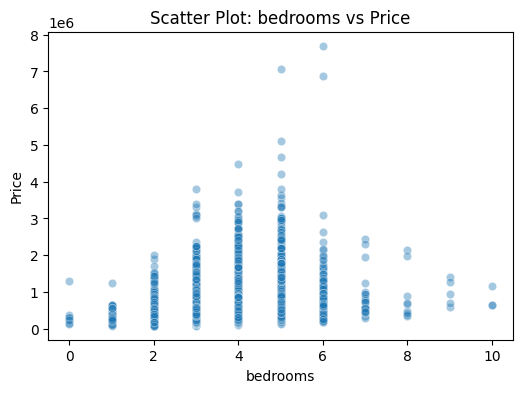

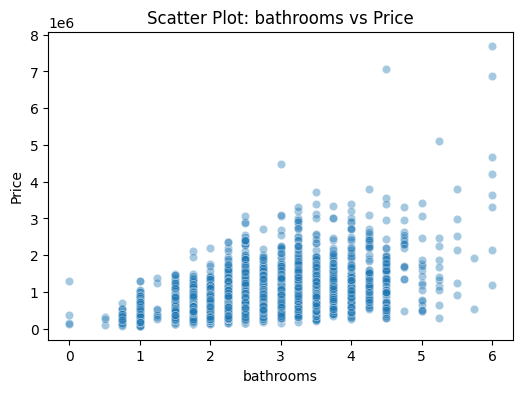

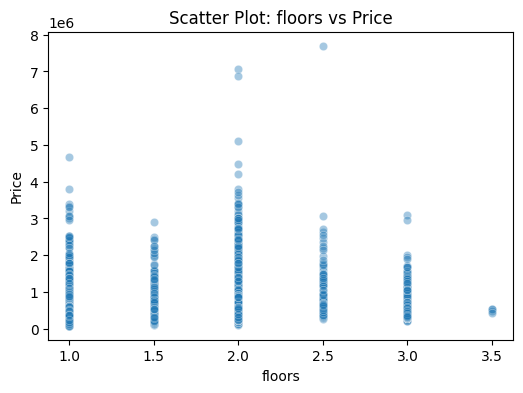

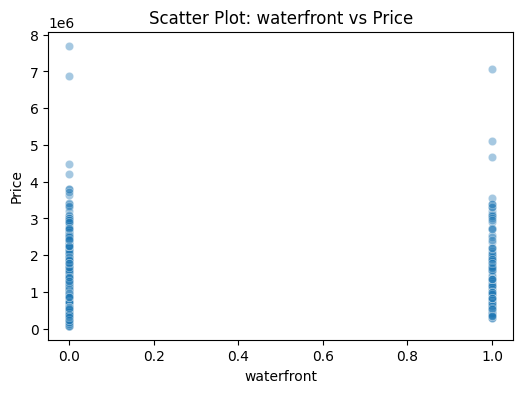

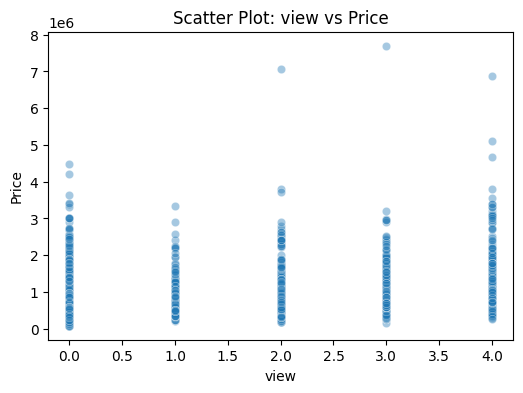

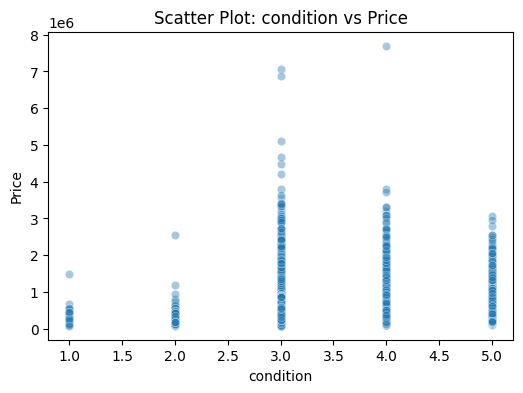

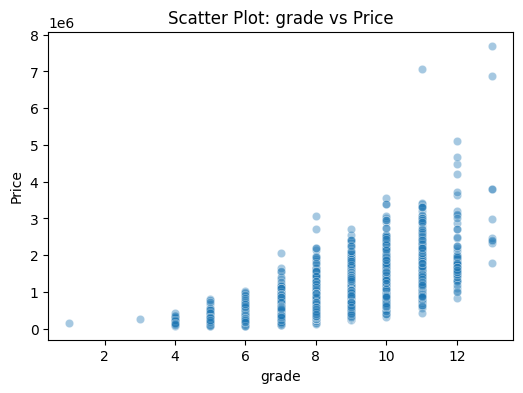

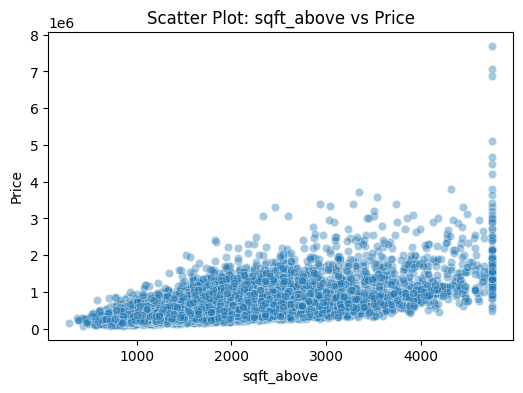

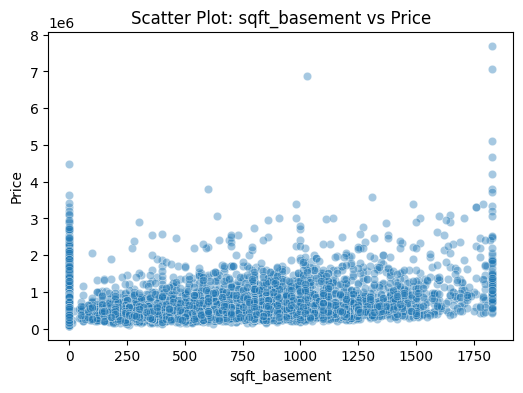

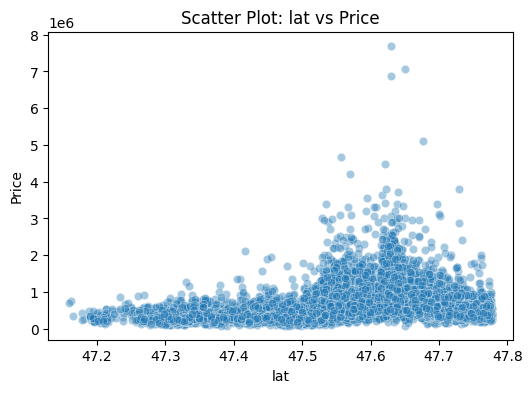

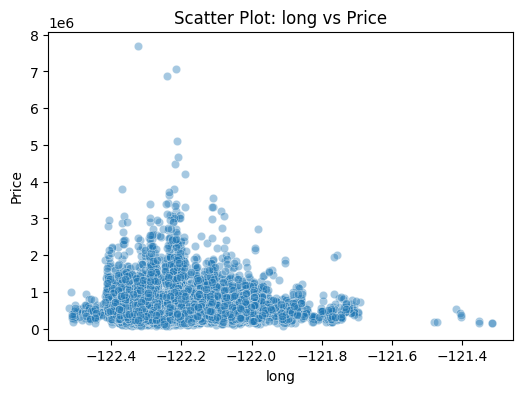

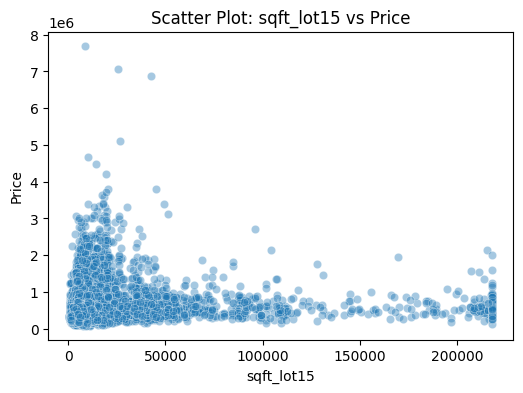

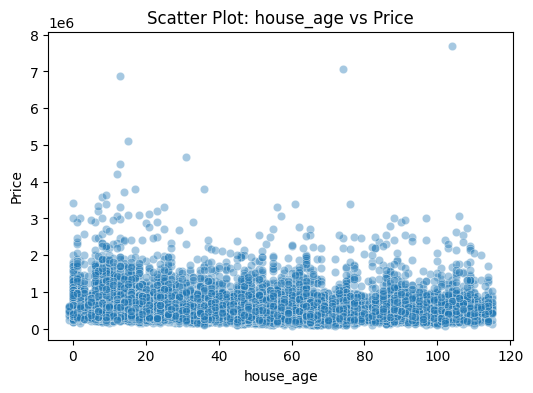

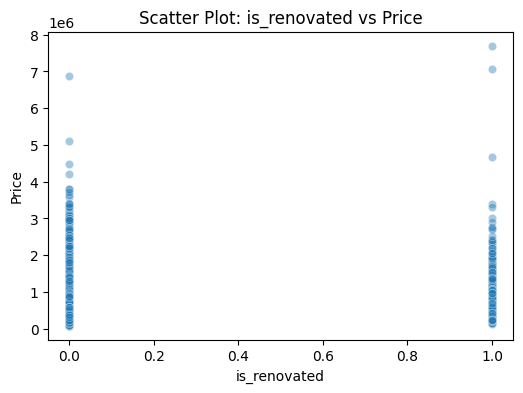

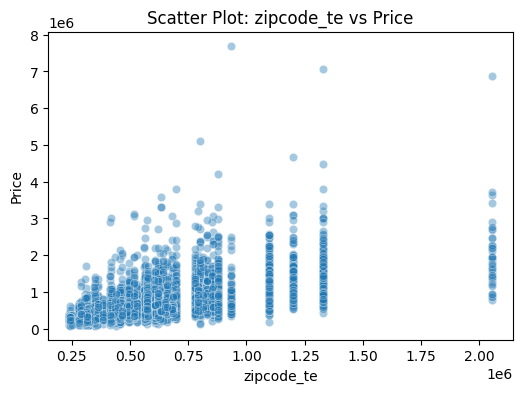

In [88]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[col], y=train["price"], alpha=0.4)
    plt.title(f"Scatter Plot: {col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

In [116]:

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [112]:
# Binary features (no scaling)
binary_features = [
    "waterfront",
    "is_renovated"
]
# Ordinal / discrete numeric
ordinal_features = [
    "bedrooms",
    "bathrooms",
    "floors",
    "view",
    "condition",
    "grade",
    "house_age"
]
# Continuous + skewed numeric
continuous_features = [
    "sqft_above",
    "sqft_basement",
    "sqft_lot15",
    "zipcode_te",
    "lat",
    "long"
]


In [118]:
X = df[continuous_features + ordinal_features + binary_features]
y = df["price"]

In [119]:
# 3️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [120]:
preprocessor = ColumnTransformer(
    transformers=[
        ("continuous", StandardScaler(), continuous_features),
        ("ordinal", StandardScaler(), ordinal_features),
        ("binary", "passthrough", binary_features)
    ]
)


In [121]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)


In [122]:
# 6️⃣ Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  StandardScaler(),
                                                  ['sqft_above',
                                                   'sqft_basement',
                                                   'sqft_lot15', 'zipcode_te',
                                                   'lat', 'long']),
                                                 ('ordinal', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'view',
                                                   'condition', 'grade',
                                                   'house_age']),
                                                 ('binary', 'passthrough',
                                                  ['waterfront',
                                                   'is_renovated'])])),
                ('regressor', LinearRegression())])

In [123]:
# 7️⃣ Make predictions on test set
y_pred = model.predict(X_test)

In [127]:

# 8️⃣ Evaluate (example: R^2 score)
from sklearn.metrics import r2_score
print("R^2 score:", r2_score(y_test, y_pred))

R^2 score: 0.8531446596827541


In [130]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03839865128992422


In [131]:
import numpy as np

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape, "%")


MAPE: 1.1280382957597461 %
